# ICS 485 Course Project:
Ahmed Alzuhair ID: 202278540
Abdulaziz Alqahtani

In [85]:
import pandas as pd


df = pd.read_csv("dataset-train-vf.csv")

df_test = pd.read_csv("dataset-test-vf.csv")

print("train dataset shape:", df.shape)

print("test dataset shape:", df_test.shape)

print("Training dataset")
display(df.head())

print("Testing Dataset")
df_test.head()


train dataset shape: (4480, 13)
test dataset shape: (792, 12)
Training dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


Testing Dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4


## Data Analysis and Preprocessing


Training Missing values per column:
 ID        0
f1     1838
f2        0
f3     1384
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10    3912
f11       0
y         0
dtype: int64
\Testing Missing values per column:
 ID       0
f1     306
f2       0
f3     243
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10    668
f11      0
dtype: int64

Statistics:
                 ID           f1            f2           f3           f4  \
count  4480.000000  2642.000000  4.480000e+03  3096.000000  4480.000000   
mean   2240.500000     0.007127  2.559716e+04   234.375598     0.786005   
std    1293.408932     0.009138  9.400564e+04   106.207714     0.163220   
min       1.000000     0.000081  1.610000e+02    35.750000     0.062000   
25%    1120.750000     0.001397  2.783000e+03   170.300000     0.681000   
50%    2240.500000     0.003321  7.590000e+03   218.075000     0.802500   
75%    3360.250000     0.008586  2.270100e+04   271.050000     0.920000 

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1180353275.py:6: SyntaxWarning: invalid escape sequence '\T'
  print("\Testing Missing values per column:\n", df_test.isna().sum())


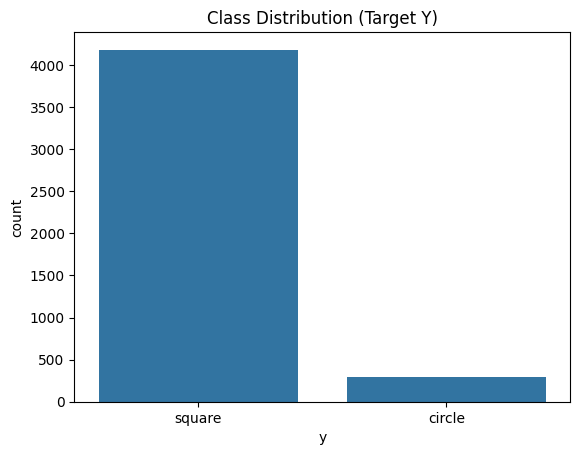

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", df.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())

print("\nStatistics:\n", df.describe())


# Class distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target Y)")
plt.show()

In [87]:
df_test

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4
...,...,...,...,...,...,...,...,...,...,...,...,...
787,5268,0.017578,64883,234.65,0.686,9.263636,29010,18.806667,4.922775,665700,NaN,C2
788,5269,0.024139,54832,157.30,0.791,5.236364,28290,15.893333,3.208563,597800,NaN,C2
789,5270,0.000405,1265,425.75,0.727,0.327273,600,0.366667,0.184310,13300,0.581246,C4
790,5271,0.004374,11178,124.15,0.741,0.845455,5400,3.240000,0.485303,118440,NaN,C2


### *2.1 Data Cleaning*

In [88]:
# Drop ID (since it is not useful)
# + drop f10 (missing 3912/4480 which is a lot that we cannot recover)
df = df.drop(columns=["ID", "f10"])

## remove from test data columns
df_test = df_test.drop(columns=["ID", "f10"])
print(df.head())

         f1     f2     f3     f4        f5     f6         f7        f8  \
0       NaN  62330    NaN  0.748  4.845455  30405  18.066667  2.807634   
1       NaN   4370    NaN  0.858  1.072727   2445   1.266667  0.712986   
2  0.000729   1449  196.3  0.841  0.172727    795   0.420000  0.112528   
3  0.043499  24702  349.7  0.594  5.254545   9570   7.160000  2.417831   
4  0.000972   1104  162.5  0.792  0.109091    570   0.320000  0.066930   

       f9 f11       y  
0  663180  C1  square  
1   49420  C2  square  
2   16240  C2  square  
3  239680  C3  circle  
4   12040  C3  square  


### *_* Data Spliting

In [89]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)

numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)




(3808, 10) (672, 10)
Numeric: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
Categorical: ['f11']


### 2.2 Filling NaN Values

Impute the cols that have missing values, since the missing values are in coloumns f1 and f3 are all numeric then take the median

In [90]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_val[numeric_cols]   = X_val[numeric_cols].fillna(X_train[numeric_cols].median())

df_test[numeric_cols] = df_test[numeric_cols].fillna(df_test[numeric_cols].median())

X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11
120,0.005427,18492,244.40,0.751,2.745455,9060,5.360000,1.597197,197120,C4
826,0.008424,19136,373.75,0.870,4.345455,10860,5.546667,2.928592,217840,C3
3034,0.010693,27324,109.20,0.693,1.809091,12345,7.920000,0.971176,281540,C2
2117,0.002349,4002,273.00,0.937,0.663636,2445,1.160000,0.481697,47180,C4
3715,0.002997,6808,243.75,0.753,1.009091,3345,1.973333,0.588613,72660,C4
...,...,...,...,...,...,...,...,...,...,...
1925,0.003321,1449,247.65,0.857,0.218182,810,0.420000,0.144845,16380,C4
2908,0.000972,2208,277.55,0.906,0.372727,1305,0.640000,0.261592,25620,C1
2141,0.008100,25300,218.40,0.882,4.727273,14550,7.333333,3.229859,289800,C4
3870,0.003402,8694,249.60,0.817,1.318182,4635,2.520000,0.834261,96180,C4


### 2.3 One-hot-encoding for categorical columns

In [91]:
X_train_dum = pd.get_dummies(X_train[categorical_cols], prefix=categorical_cols)
X_val_dum = pd.get_dummies(X_val[categorical_cols],   prefix=categorical_cols)
# X_val_dum = X_val_dum.reindex(columns=X_train_dum.columns, fill_value=0)
df_test_dum = pd.get_dummies(df_test[categorical_cols], prefix=categorical_cols)
df_test_dum = df_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)


## Drop the coulumns we did one hot encoding for (categorical)
X_train = X_train.drop(columns=categorical_cols)
X_val = X_val.drop(columns=categorical_cols)

df_test = df_test.drop(columns=categorical_cols)


### Make the y's as 0 and 1s
y_train = y_train.map({"square": 0, "circle": 1})
y_val = y_val.map({"square": 0, "circle":1})



### 2.4 Scale the numeric columns

In [92]:
from sklearn.preprocessing import StandardScaler

# scale the numeric columns
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train)
X_val_num = scaler.transform(X_val)

df_test_num = scaler.transform(df_test)


X_train_num = pd.DataFrame(X_train_num, columns=X_train.columns, index=X_train.index)
X_val_num = pd.DataFrame(X_val_num, columns=X_val.columns, index=X_val.index)

df_test_num = pd.DataFrame(df_test_num, columns=df_test.columns, index=df_test.index)

In [93]:
import numpy as np

# concat non numeric with numeric
X_train = pd.concat([X_train_num, X_train_dum], axis=1)
X_val  = pd.concat([X_val_num, X_val_dum], axis=1)
df_test = pd.concat([df_test_num, df_test_dum], axis =1)



### 2.5 Resolve Imbalance


In [94]:
from imblearn.over_sampling import SMOTE

## Use SMOTE for class imbalance
sm = SMOTE(random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(pd.factorize(y_train)[0]))
print("After SMOTE:", np.bincount(pd.factorize(y_train_bal)[0]))

X_train = X_train_bal
y_train = y_train_bal



Before SMOTE: [3554  254]
After SMOTE: [3554 3554]


In [95]:
y_train

,y
0,0
1,0
2,0
3,0
4,0
...,...
7103,1
7104,1
7105,1
7106,1


## Models and Training

In [63]:
for df_name in ['X_train', 'X_val', 'df_test']:
    df = globals()[df_name]
    # Identify boolean columns
    boolean_cols = df.select_dtypes(include='bool').columns.tolist()
    # Convert boolean columns to integer (0 or 1)
    for col in boolean_cols:
        df[col] = df[col].astype(int)
    print(f"Data types after conversion for {df_name}:\n{df.dtypes.tail()}\n")

# Display the head of X_train to confirm changes
X_train.head()

Data types after conversion for X_train:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object

Data types after conversion for X_val:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object

Data types after conversion for df_test:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,-0.014595,-0.071576,0.166411,-0.214962,-0.025296,-0.063132,-0.071576,-0.020791,-0.072084,0,0,0,1
1,0.403035,-0.063198,1.622856,0.514906,0.159999,0.018334,-0.063198,0.238050,-0.039969,0,0,1,0
2,0.719079,0.043326,-1.355903,-0.570695,-0.133735,0.085544,0.043326,-0.142498,0.058761,0,1,0,0
3,-0.443512,-0.260088,0.488439,0.925839,-0.266389,-0.362520,-0.260088,-0.237659,-0.304478,0,0,0,1
4,-0.353214,-0.223582,0.159092,-0.202695,-0.226382,-0.321787,-0.223582,-0.216874,-0.264987,0,0,0,1


In [64]:
X_full_train = pd.concat([X_train, X_val], ignore_index=True)
y_full_train = pd.concat([y_train, y_val], ignore_index=True)

print("Shape of concatenated X_full_train:", X_full_train.shape)
print("Shape of concatenated y_full_train:", y_full_train.shape)

# Display the head of the new dataframes to confirm
print("X_full_train head:")
display(X_full_train.head())
print("y_full_train head:")
display(y_full_train.head())

Shape of concatenated X_full_train: (7780, 13)
Shape of concatenated y_full_train: (7780,)
X_full_train head:


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,-0.014595,-0.071576,0.166411,-0.214962,-0.025296,-0.063132,-0.071576,-0.020791,-0.072084,0,0,0,1
1,0.403035,-0.063198,1.622856,0.514906,0.159999,0.018334,-0.063198,0.238050,-0.039969,0,0,1,0
2,0.719079,0.043326,-1.355903,-0.570695,-0.133735,0.085544,0.043326,-0.142498,0.058761,0,1,0,0
3,-0.443512,-0.260088,0.488439,0.925839,-0.266389,-0.362520,-0.260088,-0.237659,-0.304478,0,0,0,1
4,-0.353214,-0.223582,0.159092,-0.202695,-0.226382,-0.321787,-0.223582,-0.216874,-0.264987,0,0,0,1


y_full_train head:


,y
0,0
1,0
2,0
3,0
4,0


### KNN:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}



In [66]:
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best hyperparameters:", grid.best_params_)


Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [67]:
best_knn = grid.best_estimator_
y_val_pred = best_knn.predict(X_val)


val_f1 = f1_score(y_val, y_val_pred)
print("Validation F1-score:", val_f1)

Validation F1-score: 0.5737704918032787


In [68]:
y_test_pred = best_knn.predict(df_test)
y_test_pred.size

792

In [69]:
submission = pd.read_csv("Submission.csv")
submission["y"] = y_test_pred
submission.to_csv("Submission_knn.csv", index=False)


In [70]:
df_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,-0.308065,-0.196951,-0.045835,-0.791495,-0.188481,-0.301421,-0.196951,-0.199081,-0.239165,0,1,0,0
1,1.215720,0.214482,-1.260759,-1.435496,-0.007398,0.186697,0.214482,-0.090224,0.215209,1,0,0,0
2,-0.691833,-0.299585,1.249596,1.312240,-0.320082,-0.444665,-0.299585,-0.301187,-0.359377,0,0,1,0
3,-0.308065,-0.298688,-0.045835,0.766372,-0.317976,-0.445344,-0.298688,-0.301374,-0.358943,1,0,0,0
4,-0.635397,-0.283427,0.766554,0.484239,-0.296920,-0.416831,-0.283427,-0.279199,-0.338763,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1.678499,0.531960,0.056629,-0.613629,0.729568,0.839784,0.531960,0.625746,0.654178,0,1,0,0
788,2.592770,0.401198,-0.814311,0.030372,0.263174,0.807198,0.401198,0.292480,0.548938,0,1,0,0
789,-0.714408,-0.295695,2.208361,-0.362162,-0.305343,-0.446023,-0.295695,-0.295475,-0.356990,0,0,0,1
790,-0.161330,-0.166730,-1.187571,-0.276295,-0.245332,-0.228780,-0.166730,-0.236958,-0.194031,0,1,0,0


### Nueral Networks

In [71]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe_mlp = Pipeline([
	("smote", SMOTE(random_state=42)),
	("mlp", MLPClassifier(random_state=42, max_iter=1000))
])

param_grid = {
	"mlp__hidden_layer_sizes": [(50,), (50, 25), (75, 25), (50, 50), ((10, 20, 20, 5))],
	"mlp__activation": ["relu", "tanh"],
	"mlp__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_mlp = GridSearchCV(
	estimator=pipe_mlp,
	param_grid=param_grid,
	scoring="f1",
	cv=cv,
	n_jobs=-1,
	verbose=2
)

grid_search_mlp.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('mlp',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'mlp__hidden_layer_sizes': [(50,), (50, 25), (75, 25),
                                                     (50, 50),
                                                     (10, 20, 20, 5)]},
             scoring='f1', verbose=2)

In [72]:
from sklearn.metrics import f1_score, classification_report

# Predict on Validation Set with best MLPClassifier
best_mlp = grid_search_mlp.best_estimator_
y_val_pred_mlp = best_mlp.predict(X_val)

# Evaluate MLPClassifier Performance
print("\nValidation Classification Report (MLPClassifier):")
print(classification_report(y_val, y_val_pred_mlp))
val_f1_mlp = f1_score(y_val, y_val_pred_mlp)
print(f"Validation F1-score (MLPClassifier): {val_f1_mlp}")

# Predict on Test Set with best MLPClassifier
y_test_pred_mlp = best_mlp.predict(df_test)

# Generate Submission File for MLPClassifier
submission_mlp = pd.read_csv("Submission.csv")
submission_mlp["y"] = y_test_pred_mlp
submission_mlp.to_csv("Submission_mlp.csv", index=False)
print("Submission file 'Submission_mlp.csv' created successfully.")


Validation Classification Report (MLPClassifier):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       627
           1       0.51      0.78      0.61        45

    accuracy                           0.93       672
   macro avg       0.75      0.86      0.79       672
weighted avg       0.95      0.93      0.94       672

Validation F1-score (MLPClassifier): 0.6140350877192983
Submission file 'Submission_mlp.csv' created successfully.


### Decision Tree

In [73]:
from xgboost import XGBClassifier

# Create an instance of XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

print("XGBClassifier instance created.")
print("Parameter grid for XGBoost defined:", xgb_param_grid)

XGBClassifier instance created.
Parameter grid for XGBoost defined: {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.9, 1.0]}


In [74]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb_classifier) # xgb_classifier was defined in the previous step
])

# Define the parameter grid for GridSearchCV, correctly prefixed for the pipeline
xgb_param_grid_prefixed = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.7, 0.9, 1.0]
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=xgb_param_grid_prefixed,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:29:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters for XGBoost: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 0.9}


In [75]:
best_xgb_classifier = grid_search_xgb.best_estimator_
y_val_pred_xgb = best_xgb_classifier.predict(X_val)

print("Predictions on the validation set made successfully with the best XGBoost model.")

Predictions on the validation set made successfully with the best XGBoost model.


In [76]:
from sklearn.metrics import f1_score, classification_report

# Evaluate XGBoost Classifier Performance
print("\nValidation Classification Report (XGBoost Classifier):")
print(classification_report(y_val, y_val_pred_xgb))
val_f1_xgb = f1_score(y_val, y_val_pred_xgb)
print(f"Validation F1-score (XGBoost Classifier): {val_f1_xgb}")


Validation Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       627
           1       0.58      0.76      0.65        45

    accuracy                           0.95       672
   macro avg       0.78      0.86      0.81       672
weighted avg       0.95      0.95      0.95       672

Validation F1-score (XGBoost Classifier): 0.6538461538461539


In [77]:
y_test_pred_xgb = best_xgb_classifier.predict(df_test)
print("Predictions on the test set made successfully with the best XGBoost model.")

Predictions on the test set made successfully with the best XGBoost model.


In [78]:
submission_xgb = pd.read_csv("Submission.csv")
submission_xgb["y"] = y_test_pred_xgb
submission_xgb.to_csv("Submission_xgb.csv", index=False)
print("Submission file 'Submission_xgb.csv' created successfully.")

Submission file 'Submission_xgb.csv' created successfully.
